In [1]:
#Data cleaning, transformation and visualization -> trying couple models

In [2]:
import pandas as pd
import statistics as stat
from pandas import read_csv
from matplotlib import pyplot

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

In [3]:
#Reading raw data
file = 'dnac-customer-bookings.csv'
data = pd.read_csv(file, sep=',', header=0, parse_dates=True)
data

,cust,segment,vertical,sub_vertical,country,bookings,purchase
0,d66648938c68318a8dad17a77f0c8327,Commercial,Manufacturing,Hi-tech/Computers Manufacturing,UNITED STATES,103356,False
1,dcce1fa11f27a6a2c57c8aacf5f0219c,Commercial,Retail,Other (Retail),UNITED STATES,62952,True
2,136b88d1b2aea8ae74cbfe111830af69,Commercial,Retail,Other (Retail),ITALY,2886,True
3,674c6fcb90b5d29765f266007ad423e1,Enterprise,Retail,Other (Retail),UNITED STATES,80253,True
4,97c72b3833ce8ef5154826fc128522b1,Commercial,Health Care,Providers,AUSTRALIA,29424,False
...,...,...,...,...,...,...,...
27338,d95a7c1779b6165d0302e8e191243239,Enterprise,Professional Services,Construction/Engineering,UNITED STATES,4142,True
27339,24113cecc9177b25a3d22c84f9d6ceec,Enterprise,Government,Federal/Central Government,CHINA,6233,False
27340,c082a0889baf15ce697b044914e3ed44,Enterprise,Manufacturing,Discrete Manufacturing,UNITED STATES,4003,False
27341,9a28b51f3f5d510a98c8b92446ea9a00,Commercial,Retail,"Consumer Services(dry cleaners,video rental,etc)",UNITED STATES,1471,True


In [4]:
data["cust"].describe()

count                                27343
unique                               27343
top       3c01a3925f8d0d4c6f0a8bd535c75a2d
freq                                     1
Name: cust, dtype: object

In [5]:
data["segment"].describe()

count          27343
unique             5
top       Enterprise
freq           16623
Name: segment, dtype: object

In [6]:
data["vertical"].describe()

count                     27343
unique                        8
top       Professional Services
freq                       5553
Name: vertical, dtype: object

In [7]:
data["sub_vertical"].describe()

count                          27343
unique                            15
top       Federal/Central Government
freq                            3559
Name: sub_vertical, dtype: object

In [8]:
data["country"].describe()

count             27343
unique               14
top       UNITED STATES
freq              13810
Name: country, dtype: object

In [9]:
data["bookings"].describe()

count       27343
unique      22474
top       unknown
freq           73
Name: bookings, dtype: object

In [10]:
#Removing "cust" column as unique in each row, removing "segment" column as redundant, removing "bookings" column which has too many unique values
#Encoding "vertical, "sub_vertical" and "purchase" columns
data = data.drop("cust", axis=1)
data = data.drop("segment", axis=1)
data = data.drop("bookings", axis=1)

data["sub_vertical"] = data["sub_vertical"].astype("category")
sub_vertical_encode = LabelEncoder()
data["sub_vertical"] = sub_vertical_encode.fit_transform(data.sub_vertical)
data["purchase"] = data["purchase"].astype("category")
purchase_encode = LabelEncoder()
data["purchase"] = purchase_encode.fit_transform(data.purchase)
data["vertical"] = data["vertical"].astype("category")
country_encode = LabelEncoder()
data["vertical"] = country_encode.fit_transform(data.country)

data

,vertical,sub_vertical,country,purchase
0,12,6,UNITED STATES,0
1,12,10,UNITED STATES,1
2,8,10,ITALY,1
3,12,10,UNITED STATES,1
4,0,12,AUSTRALIA,0
...,...,...,...,...
27338,12,0,UNITED STATES,1
27339,3,5,CHINA,0
27340,12,4,UNITED STATES,0
27341,12,3,UNITED STATES,1


In [11]:
#Checking "country" column
data["country"].value_counts()

UNITED STATES     13810
UNITED KINGDOM     2246
CHINA              1836
GERMANY            1683
CANADA             1277
JAPAN              1228
AUSTRALIA          1183
FRANCE              983
ITALY               787
MEXICO              733
INDIA               705
BRAZIL              451
USA                 347
DEUTSCHLAND          74
Name: country, dtype: int64

In [12]:
#Fixing different names for the same country
def fix(column):
    results = {}
    results['column'] = column.name

    #Replacing different names for the same country
    country_column = []
    for value in column:
        if value == "USA":
            country_column.append("UNITED STATES")
        elif value == "DEUTSCHLAND":
            country_column.append("GERMANY")
        else:
            country_column.append(value)

    #Creating new column data with 'fixed' entries
    results['data'] = country_column

    return results  

#Replacing data with new value
temp_data = data.apply(fix)
for m in temp_data:
    data[m['column']] = m['data']

,vertical,sub_vertical,country,purchase
0,12,6,UNITED STATES,0
1,12,10,UNITED STATES,1
2,8,10,ITALY,1
3,12,10,UNITED STATES,1
4,0,12,AUSTRALIA,0
...,...,...,...,...
27338,12,0,UNITED STATES,1
27339,3,5,CHINA,0
27340,12,4,UNITED STATES,0
27341,12,3,UNITED STATES,1


In [13]:
#Encoding "country" column 
data["country"] = data["country"].astype("category")
country_encode = LabelEncoder()
data["country"] = country_encode.fit_transform(data.country)

data

,vertical,sub_vertical,country,purchase
0,12,6,11,0
1,12,10,11,1
2,8,10,7,1
3,12,10,11,1
4,0,12,0,0
...,...,...,...,...
27338,12,0,11,1
27339,3,5,3,0
27340,12,4,11,0
27341,12,3,11,1


In [14]:
data["country"].value_counts()

11    14157
10     2246
3      1836
5      1757
2      1277
8      1228
0      1183
4       983
7       787
9       733
6       705
1       451
Name: country, dtype: int64

In [15]:
#Scaling all cloumns
scaler = MinMaxScaler()

data['country_scaled'] = scaler.fit_transform(data['country'].values.reshape(-1,1))
data = data.drop("country", axis=1)
data['vert_scaled'] = scaler.fit_transform(data['vertical'].values.reshape(-1,1))
data = data.drop("vertical", axis=1)
data['sub_scaled'] = scaler.fit_transform(data['sub_vertical'].values.reshape(-1,1))
data = data.drop("sub_vertical", axis=1)

data

,purchase,country_scaled,vert_scaled,sub_scaled
0,0,1.000000,0.923077,0.428571
1,1,1.000000,0.923077,0.714286
2,1,0.636364,0.615385,0.714286
3,1,1.000000,0.923077,0.714286
4,0,0.000000,0.000000,0.857143
...,...,...,...,...
27338,1,1.000000,0.923077,0.000000
27339,0,0.272727,0.230769,0.357143
27340,0,1.000000,0.923077,0.285714
27341,1,1.000000,0.923077,0.214286


In [16]:
data['country_scaled'].describe()

count    27343.000000
mean         0.749991
std          0.329987
min          0.000000
25%          0.454545
50%          1.000000
75%          1.000000
max          1.000000
Name: country_scaled, dtype: float64

In [17]:
len(list(data["country_scaled"].unique()))

12

In [18]:
data['vert_scaled'].describe()

count    27343.000000
mean         0.698736
std          0.304718
min          0.000000
25%          0.461538
50%          0.923077
75%          0.923077
max          1.000000
Name: vert_scaled, dtype: float64

In [19]:
len(list(data["vert_scaled"].unique()))

14

In [20]:
data['sub_scaled'].describe()

count    27343.000000
mean         0.539673
std          0.287166
min          0.000000
25%          0.357143
50%          0.571429
75%          0.785714
max          1.000000
Name: sub_scaled, dtype: float64

In [21]:
len(list(data["sub_scaled"].unique()))

15

In [22]:
data.describe()

,purchase,country_scaled,vert_scaled,sub_scaled
count,27343.000000,27343.000000,27343.000000,27343.000000
mean,0.351095,0.749991,0.698736,0.539673
std,0.477321,0.329987,0.304718,0.287166
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.454545,0.461538,0.357143
50%,0.000000,1.000000,0.923077,0.571429
75%,1.000000,1.000000,0.923077,0.785714
max,1.000000,1.000000,1.000000,1.000000


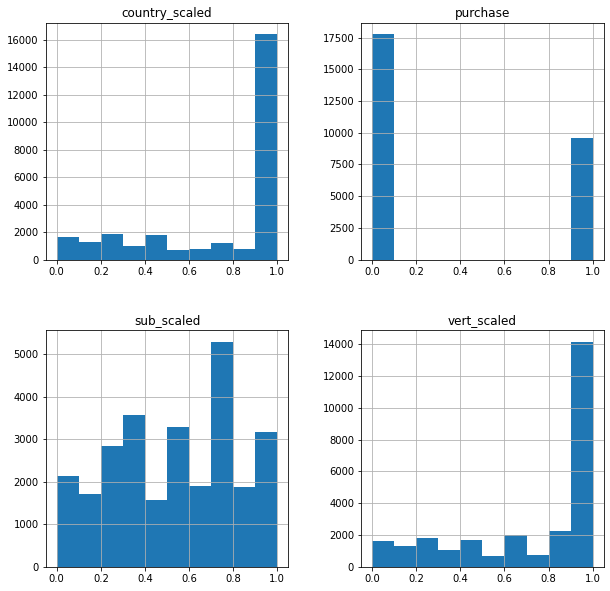

In [23]:
data.hist(figsize=(10,10)) 
pyplot.show()

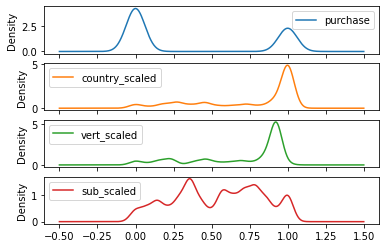

In [24]:
#data.plot(kind="density", subplots=True, layout=(4,4), sharex=False) 
data.plot.kde(subplots=True)
pyplot.show()

In [25]:
#Trying couple models

In [26]:
#Create feature and target for classification
features = data.drop("purchase", axis=1).values
target = data["purchase"].values

In [27]:
#Split the data for training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [28]:
#Initializing the DT classifier
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 100)

#Fitting on the training data
dt.fit(X_train, y_train)

#Testing accuracy on the test data
dt.score(X_test, y_test)

0.6443983908326222

In [29]:
#Creating predictions on the test set 
prediction = dt.predict(X_test)

#Creating the confusion matrix
print(confusion_matrix(y_test, prediction))

[[5223  100]
 [2817   63]]


In [30]:
#Initializing the kNN classifier with 100 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=100)

#Fitting the kNN classifier on the training data
knn_classifier.fit(X_train, y_train)

#Extracting the accuracy score from the test sets for kNN classifiier
knn_classifier.score(X_test, y_test)

0.6476898695599171

In [31]:
#Creating predictions on the test set 
prediction = knn_classifier.predict(X_test)

#Creating the confusion matrix
print(confusion_matrix(y_test, prediction))

[[5266   57]
 [2833   47]]
